In [10]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#Stop training model when accuracy is bigger than 0.9
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      self.model.stop_training = True
      
callbacks = Callback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = tf.nn.relu),
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 10,callbacks = [callbacks])

classifications = model.predict(x_test)



TensorFlow is already loaded. Please restart the runtime to change versions.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2496 - acc: 0.9264


[1.3156338e-05 9.3097057e-08 9.6175791e-04 1.4360058e-03 9.7544408e-08
 7.2781273e-07 3.0541028e-10 9.9756300e-01 4.5453739e-06 2.0590764e-05]
7
[4.5027000e-06 1.4690848e-05 9.9932075e-01 6.1359949e-04 2.6903568e-10
 7.9559995e-06 1.8104171e-05 6.9260828e-08 2.0386227e-05 1.0229558e-09]
2
[1.9708465e-04 9.8861104e-01 1.1895273e-03 3.8625556e-04 7.1716506e-04
 2.6743661e-03 2.0399389e-03 2.2015423e-03 1.8871255e-03 9.5951313e-05]
1
[9.9974948e-01 3.9035413e-08 6.4151369e-05 1.0719451e-05 1.4749664e-07
 2.2957576e-05 9.3689465e-05 2.0729683e-05 3.4754842e-07 3.7841011e-05]
0
[6.4689846e-04 3.1125826e-05 7.3798519e-04 1.2426286e-04 9.5271826e-01
 2.7459525e-03 1.9341960e-04 1.7838331e-03 6.9958012e-04 4.0318649e-02]
4


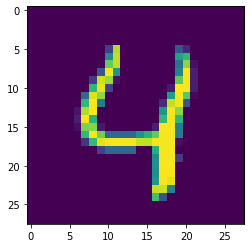

In [8]:
for x in range(5):
  print(classifications[x]) #The bigger the number, its the prediction
  print(y_test[x])          #Actual prediction
  plt.imshow(x_test[x])     #Number